# Utilising the greenhouse gases module


The greenhouse gas module contains a python class with different methods which will help analyse key features of your data.<p>
    To begin, you must import the module, then create an 'instance' of the data class for your desired site and species. To do this, supply the class with the site code and species code.
    See below for Methane in Macehead:

In [1]:
#import the module - shortened to GM for ease of use
import greenhouse_gases_module_Gracie as GM

In [2]:
#create an instance of your data class, and assign an appropriate variable name for future use
mhd_ch4 = GM.Data(site = "mhd", species = "ch4")

To the view the data and metadata now stored in this class, simply print the variable name:

In [3]:
print(mhd_ch4)

Species: ch4   Site code: mhd    Scale: sio    Units: ppb


To gain a quick understanding of the data, in order to help decide what type of operations you might want to apply to the data, use the .glimpse() method

In [4]:
GM.Data.glimpse(mhd_ch4)

,mf
count,7785.000000
mean,1956.709907
std,34.493134
min,1875.336000
25%,1934.667000
50%,1949.436000
75%,1969.530000
max,2168.798300


Now we have a base understanding of our data, we can start to operate on it using the methods built in to the Data class:
* **Method 1: weekly_ave()** Calculates the average mole fraction per week for given site and species
* **Method 2: baseline()** Calculates the baseline mole fraction values using the 5th percentile of a bi-weekly moving window

In [5]:
#using both method 1 and method 2 on the instance created earlier
mhd_ch4_weekly = GM.Data.weekly_ave(mhd_ch4)
mhd_ch4_baseline = GM.Data.baseline(mhd_ch4)

#visualise what has been done by outputting the head
mhd_ch4_weekly.head()

,Weekly average mole fraction
week,
2018-12-31/2019-01-06,1963.855364
2019-01-07/2019-01-13,1935.299381
2019-01-14/2019-01-20,1944.465896
2019-01-21/2019-01-27,1935.765502
2019-01-28/2019-02-03,1959.705202


Finally, this data can be plotted using the .plot() method, by supplying the instance of the Class to be used and the data to go with it: <p>
    Note you can find the specific scale and units in the x-axes captions. <p>
        See both weekly and baseline plots below.

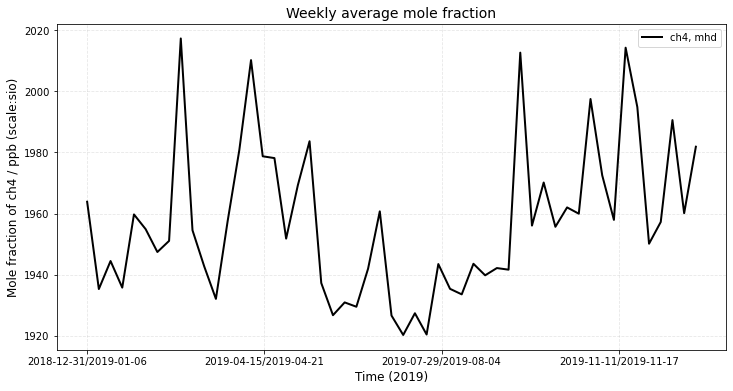

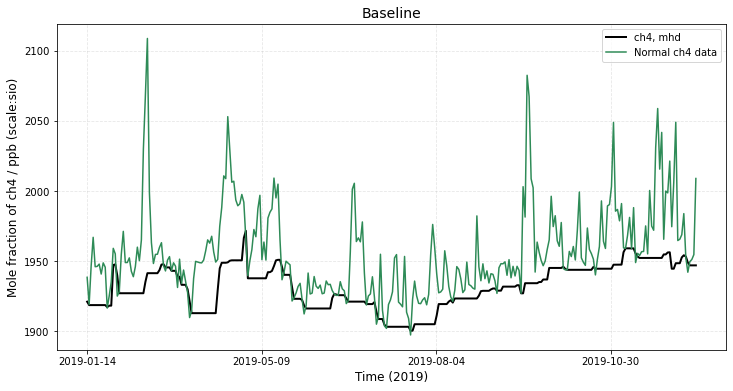

In [6]:
GM.Data.plot(mhd_ch4, mhd_ch4_weekly) #supply the instance of the class and the corresponding data feature to the method
GM.Data.plot(mhd_ch4, mhd_ch4_baseline)

Finally, the data can be compared between different sites or species, via the .plot_compare() method. Note the method will raise an error (specifically a `TypeError`) if the scale or units do not match.

An example where the .plot_compare() method will run:

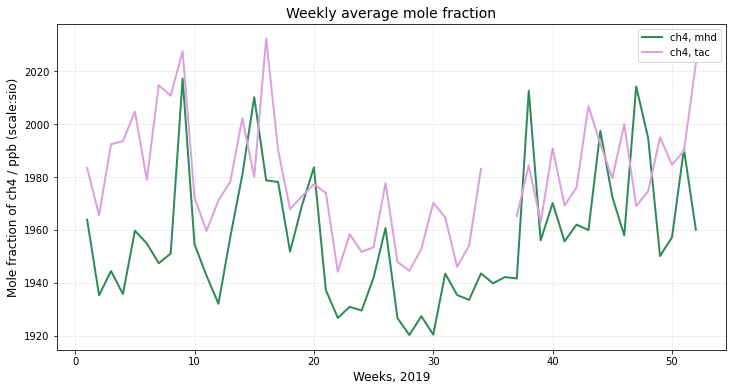

In [7]:
#initialise another instance of the data class
tac_ch4 = GM.Data(site = "tac", species = "ch4")
tac_ch4_weekly = GM.Data.weekly_ave(tac_ch4)

#use the plot_compare method, supply each instance and each data series
GM.Data.plot_compare(mhd_ch4, mhd_ch4_weekly, tac_ch4, tac_ch4_weekly)

An example where the .plot_compare() method will **not** run:

In [8]:
#initialise another instance of the data class
mhd_co2 = GM.Data(site = "mhd", species = "co2")
mhd_co2_weekly = GM.Data.weekly_ave(mhd_co2)

#use the plot_compare method
GM.Data.plot_compare(mhd_ch4, mhd_ch4_weekly, mhd_co2, mhd_co2_weekly)

TypeError: Units must match